# Support Vector Machine - Breast Cancer Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.svm import SVC

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

In [6]:
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [7]:
df = pd.read_csv('Breast_cancer_data.csv')

In [8]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [10]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [11]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='diagnosis', ylabel='count'>

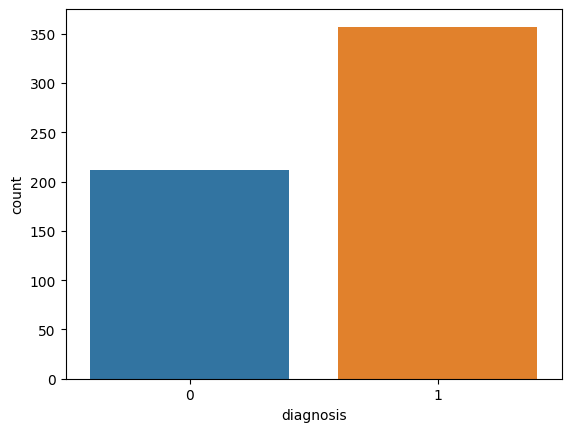

In [12]:
sns.countplot(data=df, x='diagnosis')

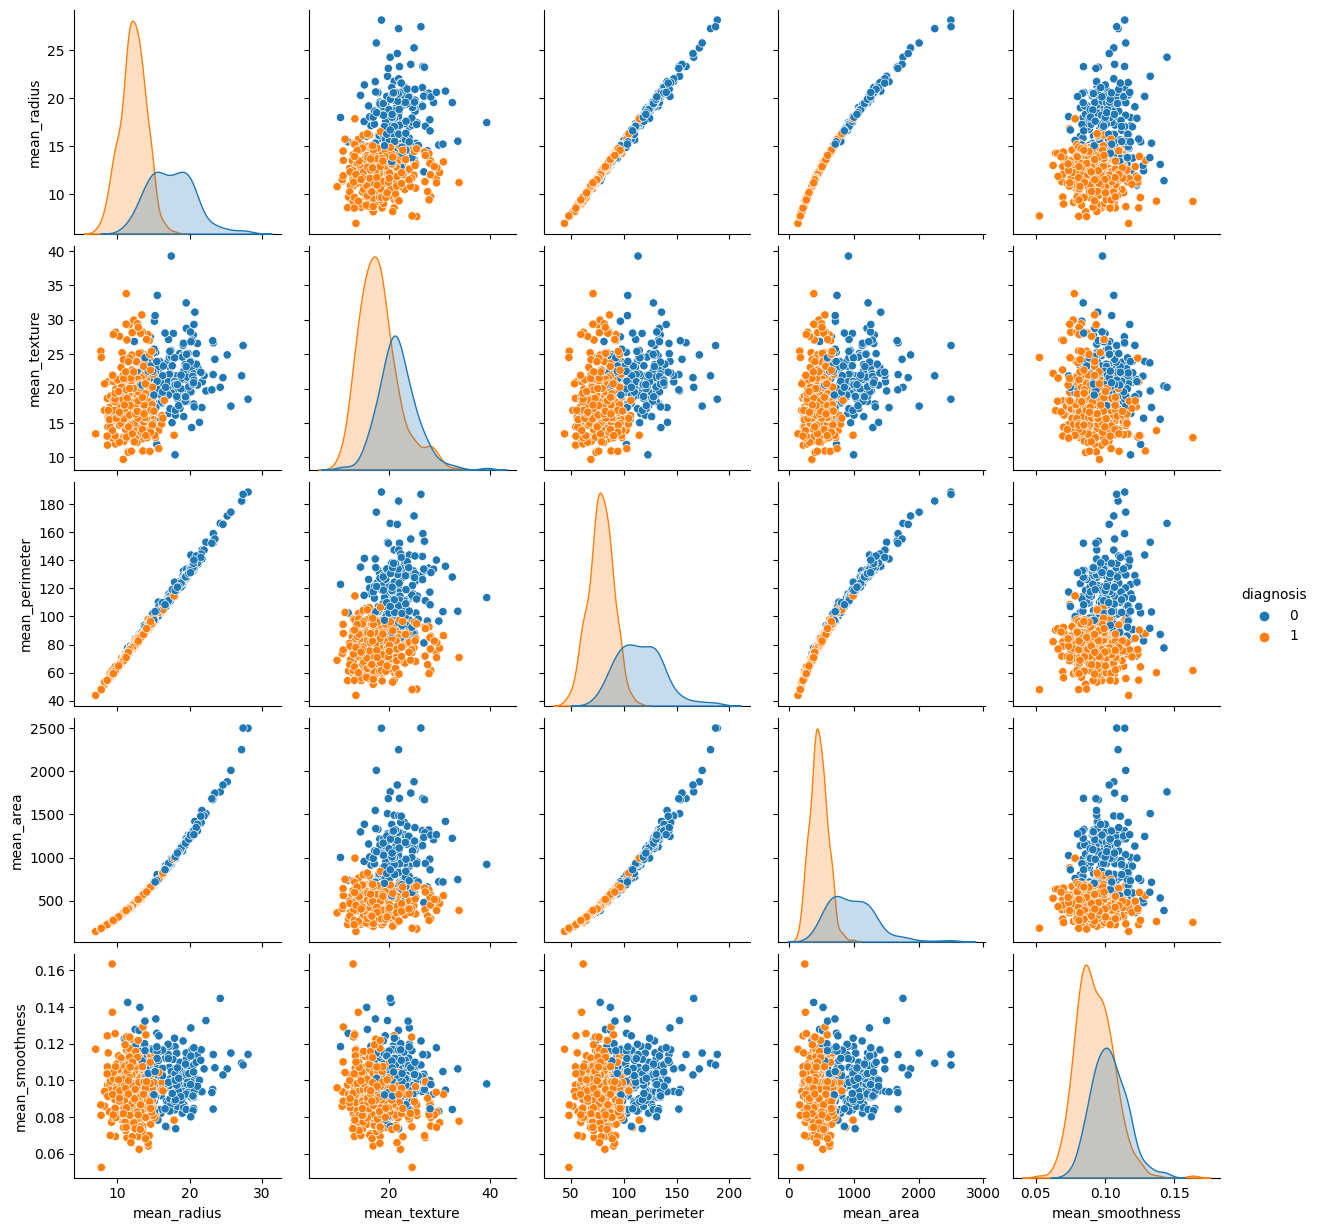

In [13]:
sns.pairplot(data=df, hue='diagnosis')

<Axes: >

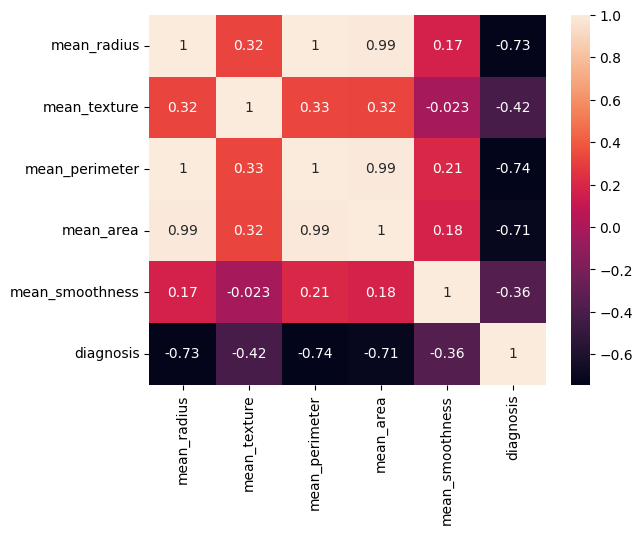

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
np.abs(df.corr(numeric_only=True)['diagnosis']).sort_values()

mean_smoothness    0.358560
mean_texture       0.415185
mean_area          0.708984
mean_radius        0.730029
mean_perimeter     0.742636
diagnosis          1.000000
Name: diagnosis, dtype: float64

<Axes: xlabel='mean_radius', ylabel='mean_perimeter'>

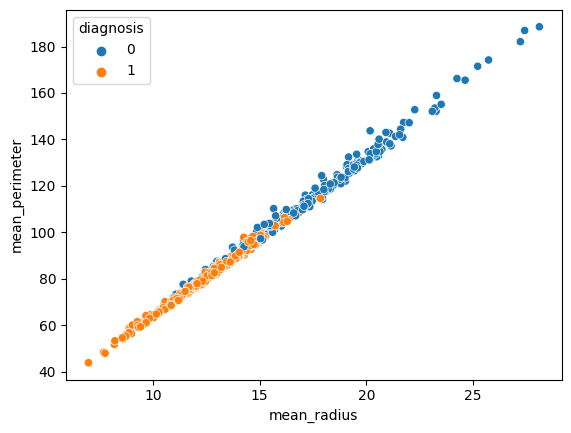

In [16]:
sns.scatterplot(data=df, x='mean_radius', y='mean_perimeter', hue='diagnosis')

## Separating X and Y Variables

In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating Model

In [19]:
model = SVC()

In [20]:
model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [21]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

In [22]:
param_grid = {'C':C, 'gamma':gamma}

In [23]:
grid_model = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

In [24]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [25]:
grid_model.best_estimator_.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Prediction and Evaluation

In [26]:
predictions = grid_model.predict(X_test)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        63
           1       0.92      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



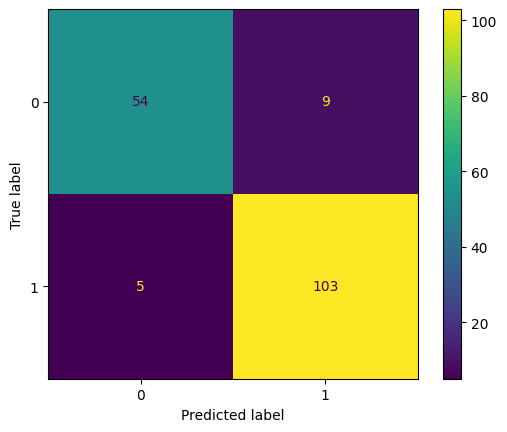

In [28]:
matrix = confusion_matrix(y_test, predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [29]:
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")

Accuracy Score: 0.9181286549707602
Precision Score: 0.9196428571428571
Recall Score: 0.9537037037037037
F1 Score: 0.9363636363636363
